In [3]:
import pandas as pd

# Load the dataset
file_path = '/Users/kumarshivam/Documents/Programming/codeforces_div2/Data for placements/Stats Studentwise (1).xlsx'
data = pd.ExcelFile(file_path)

# Display the sheet names to understand the structure
data.sheet_names


['Sheet1']

In [2]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [4]:
# Load the data from the first sheet
df = data.parse('Sheet1')

# Display the first few rows of the dataset to understand its structure
df.head()


,Name,Roll No.,Company Name,Profile,Branch
0,Jatin Rastogi,210466,Alvarez & Marsal,Associate BTS,BT-CHE
1,Abhishek Punia,210044,Nation with Namo,PIO-PPO,BT-CHE
2,B P Hitesh,210252,Texas Instruments,PIO-PPO,BT-EE
3,Akshat Gupta,200085,J. P Morgan & Chase,PIO-PPO,DoubleMajor-CSE
4,Siddharth Maurya,211033,Accenture Solutions Pvt. Ltd,PIO-PPO,BT-CHE


In [6]:
# Filter placements for BTech CSE students
btech_cse_placements = df[df['Branch'].str.contains('BT-CSE', case=False, na=False)]

# Display the filtered results
btech_cse_placements.head(102), btech_cse_placements.shape


(                   Name  Roll No.          Company Name  \
 5         Depanshu Sahu    210316                 Adobe   
 6         Ujjwal Gautam    211122                 Adobe   
 7          Anshul Kumar    210157                 Adobe   
 8          Rajeev Kumar    210815                 Adobe   
 12        Aditya Bangar    210069      American Express   
 ..                  ...       ...                   ...   
 499              Chetan    210281            MasterCard   
 500        Yash Gothwal    211189                 ixigo   
 672         Mansi Singh    210590              SAP Labs   
 682  Kruthi Akkinepally    210088          Google India   
 684           Vaishnavi    211140  Oracle India Pvt Ltd   
 
                                                Profile  Branch  
 5                                              PIO-PPO  BT-CSE  
 6                                              PIO-PPO  BT-CSE  
 7                                              PIO-PPO  BT-CSE  
 8            

In [8]:
output_file_path = '/Users/kumarshivam/Documents/Programming/codeforces_div2/Data for placements/Stats Studentwise (1).xlsx'
btech_cse_placements.to_csv(output_file_path, index=False)

output_file_path

'/Users/kumarshivam/Documents/Programming/codeforces_div2/Data for placements/Stats Studentwise (1).xlsx'

In [9]:
# Save the filtered data for BTech CSE students to a CSV file
output_file_path = 'BTech_CSE_Placements.csv'
btech_cse_placements.to_csv(output_file_path, index=False)

print(f"CSV file saved as {output_file_path}")


CSV file saved as BTech_CSE_Placements.csv


In [10]:
import pandas as pd

# Load the CSV file for BTech CSE students
csv_file_path = 'BTech_CSE_Placements.csv'
btech_cse_data = pd.read_csv(csv_file_path)

# Categorize students based on their profile
btech_cse_data['Category'] = btech_cse_data['Profile'].apply(
    lambda profile: 'PIO-PPO' if profile == 'PIO-PPO' else 'Other'
)

# Display the first few rows with the new Category column
print(btech_cse_data.head())

# Save the categorized data back to a CSV file
output_file_path = 'BTech_CSE_Categorized.csv'
btech_cse_data.to_csv(output_file_path, index=False)
print(f"Categorized data saved as {output_file_path}")


            Name  Roll No.      Company Name  Profile  Branch Category
0  Depanshu Sahu    210316             Adobe  PIO-PPO  BT-CSE  PIO-PPO
1  Ujjwal Gautam    211122             Adobe  PIO-PPO  BT-CSE  PIO-PPO
2   Anshul Kumar    210157             Adobe  PIO-PPO  BT-CSE  PIO-PPO
3   Rajeev Kumar    210815             Adobe  PIO-PPO  BT-CSE  PIO-PPO
4  Aditya Bangar    210069  American Express  PIO-PPO  BT-CSE  PIO-PPO
Categorized data saved as BTech_CSE_Categorized.csv


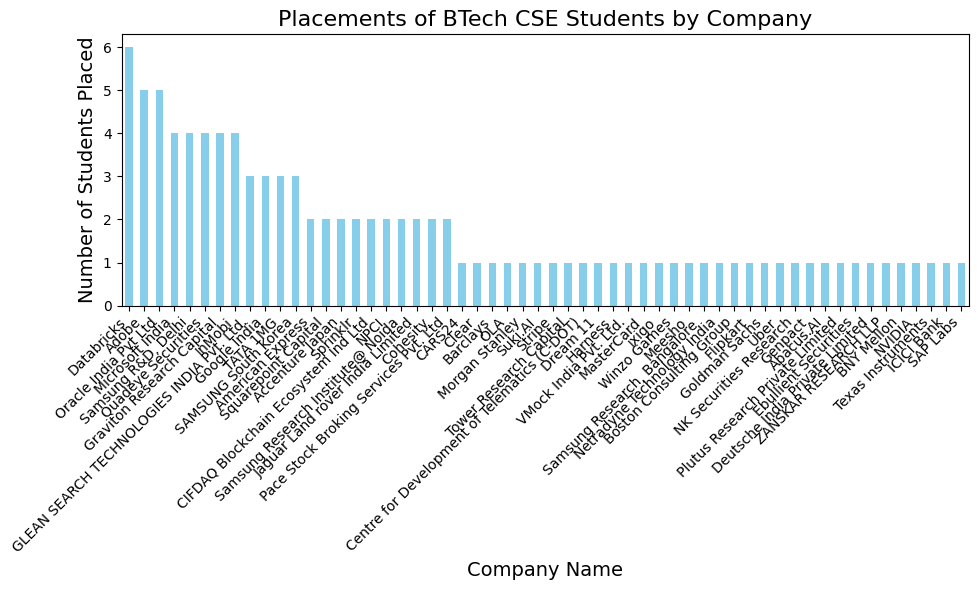

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'BTech_CSE_Placements.csv'  # Replace with your file path
df = pd.read_csv(file_path)

# Group by Company Name to get the count of placements
company_counts = df['Company Name'].value_counts()

# Plot the data
plt.figure(figsize=(10, 6))
company_counts.plot(kind='bar', color='skyblue')

# Add titles and labels
plt.title('Placements of BTech CSE Students by Company', fontsize=16)
plt.xlabel('Company Name', fontsize=14)
plt.ylabel('Number of Students Placed', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()

# Display the plot
plt.show()


In [12]:
import pandas as pd

# Load the dataset
file_path = 'BTech_CSE_Placements.csv'  # Replace with your file path
df = pd.read_csv(file_path)

# Filter students who did not get PIO-PPO
non_pio_ppo_students = df[df['Profile'] != 'PIO-PPO']

# Save the filtered data to a new CSV file
output_file_path = 'Non_PIO_PPO_Students.csv'
non_pio_ppo_students.to_csv(output_file_path, index=False)

print(f"File containing students without PIO-PPO saved as {output_file_path}")


File containing students without PIO-PPO saved as Non_PIO_PPO_Students.csv


In [15]:
import pandas as pd

# Load the dataset
file_path = '/Users/kumarshivam/Documents/Programming/codeforces_div2/Data for placements/BTech_CSE_Categorized.csv'  # Replace with the actual file path
placement_data = pd.read_csv(file_path)

# Define a function to categorize rows based on roles and offers
def categorize_profile(row):
    profile = row['Profile'].lower()
    if 'Quantitative' in profile and 'ppo' in profile:
        return 'Quant PPO'
    elif 'Quantitative' in profile:
        return 'Quant Non-PPO'
    elif 'ppo' in profile:
        return 'Software & Others PPO'
    else:
        return 'Software & Others Non-PPO'

# Apply the categorization function to create a new column
placement_data['Category_Type'] = placement_data.apply(categorize_profile, axis=1)

# Separate the data into four categories
quant_ppo = placement_data[placement_data['Category_Type'] == 'Quant PPO']
quant_non_ppo = placement_data[placement_data['Category_Type'] == 'Quant Non-PPO']
software_ppo = placement_data[placement_data['Category_Type'] == 'Software & Others PPO']
software_non_ppo = placement_data[placement_data['Category_Type'] == 'Software & Others Non-PPO']

# Save each category into separate CSV files
quant_ppo.to_csv('Quant_PPO.csv', index=False)  # Replace with the desired file path
quant_non_ppo.to_csv('Quant_Non_PPO.csv', index=False)  # Replace with the desired file path
software_ppo.to_csv('Software_PPO.csv', index=False)  # Replace with the desired file path
software_non_ppo.to_csv('Software_Non_PPO.csv', index=False)  # Replace with the desired file path

print("Files created successfully:")
print("- Quant_PPO.csv")
print("- Quant_Non_PPO.csv")
print("- Software_PPO.csv")
print("- Software_Non_PPO.csv")

Files created successfully:
- Quant_PPO.csv
- Quant_Non_PPO.csv
- Software_PPO.csv
- Software_Non_PPO.csv


In [3]:
import pandas as pd

df = pd.read_csv('/Users/kumarshivam/Documents/Programming/codeforces_div2/Data for placements/Stats Studentwise (1) (1).csv')
df.head()


,Name,Roll No.,Company Name,Profile,Branch
0,Jatin Rastogi,210466,Alvarez & Marsal,Associate BTS,BT-CHE
1,Abhishek Punia,210044,Nation with Namo,PIO-PPO,BT-CHE
2,B P Hitesh,210252,Texas Instruments,PIO-PPO,BT-EE
3,Akshat Gupta,200085,J. P Morgan & Chase,PIO-PPO,DoubleMajor-CSE
4,Siddharth Maurya,211033,Accenture Solutions Pvt. Ltd,PIO-PPO,BT-CHE


In [6]:
# now here the column Company Name is the company name
# I want to find the number of people who got into Google

google_count = df[df['Company Name'] == 'Google India'].shape[0]
print(f"Number of students placed in Google: {google_count}")

Number of students placed in Google: 9


In [7]:
#now I want to find the number of people who got into Microsoft India

microsoft_count = df[df['Company Name'] == 'Microsoft India'].shape[0]
print(f"Number of students placed in Microsoft: {microsoft_count}")

Number of students placed in Microsoft: 19


In [12]:
# print the name of those who are going to Samsung south korea



Dishant Jain


In [18]:
for company in df['Company Name'].unique():
    # if there is PIO-PPO in the profile, skip it
    if 'PIO-PPO' in df[df['Company Name'] == company]['Profile'].values:
        continue
    print(f" {company}, Count: {df[df['Company Name'] == company].shape[0]}")

 Alvarez & Marsal, Count: 6
 Accenture Solutions Pvt Ltd - Data AI, Count: 4
 Micron Technology, Count: 10
 MIPS, Count: 2
 Hero MotoCorp, Count: 4
 GE Aerospace, Count: 3
 Juniper Networks, Count: 4
 innovaccer, Count: 6
 SEDEMAC Mechatronics Pvt. Ltd., Count: 3
 Applied Materials, Count: 2
 CARS24, Count: 16
 Intel, Count: 11
 Centre for Development of Telematics (C-DOT), Count: 2
 Bajaj Auto Limited & Chetak Technology Limited, Count: 4
 Accenture Operations, Count: 3
 ThoughtSpot India Private Limited, Count: 2
 Danone, Count: 1
 MakeMyTrip, Count: 1
 Godrej Properties, Count: 8
 IdeaForge Technology Pvt. Ltd, Count: 8
 SAP Labs, Count: 6
 Turing Global India Private Limited, Count: 7
 C3iHub (IHub NTIHAC Foundation), IIT Kanpur, Count: 4
 Schlumberger, Count: 6
 KPIT Technologies Ltd, Count: 2
 Samsung Semiconductor India Research, Count: 1
 OLA, Count: 5
 Netradyne Technology India, Count: 4
 MathWorks India Pvt. Ltd., Count: 1
 Alta Capital Management LLP, Count: 1
 Meesho, Coun

In [16]:
for name in df[df['Company Name'] == 'Tower Research Capital']['Name']:
    print(name)

Udhav Varma
